# PyTorch - Convolutional Neural Network
## BSDS4 Deep Learning Elective

### Insert your name here | Student Number

2022 DS Elective 4 <br>
University of Science and Technology of the Philippines <br>
Instructor: Romen Samuel Wabina, MSc <br>

- https://pytorch.org/tutorials/

## CIFAR-10

The <a href='https://en.wikipedia.org/wiki/CIFAR-10'>CIFAR-10</a> dataset is similar to MNIST, except that instead of one color channel (grayscale) there are three channels (RGB).

Where an MNIST image has a size of (1,28,28), CIFAR images are (3,32,32). There are 10 categories an image may fall under:
0. airplane
1. automobile
2. bird
3. cat
4. deer
5. dog
6. frog
7. horse
8. ship
9. truck

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

c:\Users\Renan\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


## 1. ETL: Load the CIFAR-10 dataset
PyTorch makes the CIFAR-10 train and test datasets available through <a href='https://pytorch.org/docs/stable/torchvision/index.html'><tt><strong>torchvision</strong></tt></a>. The first time they're called, the datasets will be downloaded onto your computer to the path specified. From that point, torchvision will always look for a local copy before attempting another download.<br>The set contains 50,000 train and 10,000 test images.

Refer to the previous section for explanations of transformations, batch sizes and <a href='https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader'><tt><strong>DataLoader</strong></tt></a>.

In [2]:
'''
    TODO:
        a. Initialize transfrom that converts input to tensor. Hint: Use ToTensor()
        b. Initialize train_data using CIFAR10 testing dataset. Hint: Use torchvision.datasets
        c. Initialize test_data  using CIFAR10 testing dataset. Hint: Use torchvision.datasets
    Expected output:
        a. transform  = ?
        b. train_data = ?
        c. test_data  = ?
'''
transform  = transforms.ToTensor()

train_data = datasets.CIFAR10(root='../data', train=True,  download=True,  transform=transform)
test_data  = datasets.CIFAR10(root='../data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


### Create loaders

In [3]:
''' 
    TODO:
        a. Instantiate a manual seed
        b. Create loaders for training dataset
        c. Create loaders for testing  dataset
    Expected output:
        b. train_loader
        c. test_loader
'''
torch.manual_seed(101)  # for reproducible results

train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader  = DataLoader(test_data,  batch_size=10, shuffle=False)

Label: [1 5 8 1 6 1 6 3 7 9]
Class:    car   dog  ship   car  frog   car  frog   cat horse truck


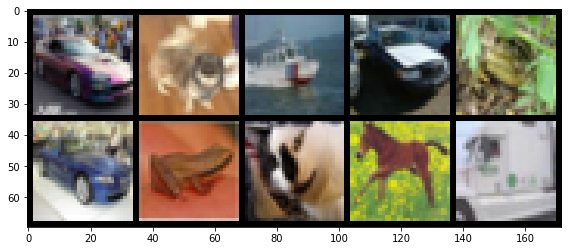

In [4]:
from torchvision.utils import make_grid

class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']
for images,labels in train_loader: 
    break

print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))

im = make_grid(images, nrow=5)  
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

## 2. Training / Modeling

<img src ="Laboratory/figures/cnn_model.jpg" width="1500">

In [ ]:
3*3=9 (9,9)

In [11]:
''' 
    TODO:
        a.  Create a class called ConvolutionalNetwork and convert the given image as code with 
            the appropriate __init__ and forward function
        Parameters:
            - The first convolutional layer must have three input channels, six output channels, and a 3 filter kernel with 1 stride
            - The second convolutional layer must have six input channels, 16 output channels, and a 3 x 3 filter kernel with 1 stride
            - The first fully-connected network (FCN) with ? input channel and 120 output channels
            - The second FCN must have ? input channels and 84 output channels
            - The third FCN must have ? input channels and 10 output channels
'''

class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 3, 1)  # changed from (1, 6, 5, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.conv3 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(6*6*6*16*16, 120)   # changed from (4*4*16) to fit 32x32 images with 3x3 filters
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 6*6*16) #Flatten
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return X

In [12]:
torch.manual_seed(101)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

Including the bias terms for each layer, the total number of parameters being trained is:<br>

$\quad\begin{align}(3\times6\times3\times3)+6+(6\times16\times3\times3)+16+(576\times120)+120+(120\times84)+84+(84\times10)+10 &=\\
162+6+864+16+69120+120+10080+84+840+10 &= 81,302\end{align}$<br>

In [8]:
'''  
    TODO: 
        a. Determine the number of parameters 
'''
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

count_parameters(model)

   162
     6
   864
    16
______
  1048


### Define loss function & optimizer

In [9]:
''' 
    TODO:
        Determine the appropriate loss function and optimizer. 
    Expected output:
        criterion = ?
        optimizer = ?
'''

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

### Train the model


In [100]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    # Run the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        # TODO: Apply the model using training set with y_pred as output
        # y_pred = ?
        y_pred = model(X_train)

        # TODO: Find the loss between the y_pred and y_train
        # loss = ?
        loss = criterion(y_pred, y_train)


        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # TODO: Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%1000 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{10*b:6}/50000]  loss: {loss.item():10.8f}  \ accuracy: {trn_corr.item()*100/(10*b):7.3f}%')
    
    # TODO: Create a list of losses for training set. Hint: Use append(). Name the list as train_losses
    train_losses.append(loss)
    train_correct.append(trn_corr)
        
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # TODO: Apply the model using testing set with y_val as output
            # y_val = ?
            y_val = model(X_test)

            predicted = torch.max(y_val.data, 1)[1] 
            tst_corr += (predicted == y_test).sum()
    
    # TODO: Find the loss between the y_val and y_test

    loss = criterion(y_val, y_test)

    # TODO: Create a list of losses for testing set. Hint: Use append(). Name the list as test_losses
    test_losses.append(loss)


    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed            

epoch:  0  batch: 1000 [ 10000/50000]  loss: 1.77669120  \ accuracy:  24.370%
epoch:  0  batch: 2000 [ 20000/50000]  loss: 2.30875015  \ accuracy:  30.790%
epoch:  0  batch: 3000 [ 30000/50000]  loss: 1.40510702  \ accuracy:  34.500%
epoch:  0  batch: 4000 [ 40000/50000]  loss: 1.90072465  \ accuracy:  37.328%
epoch:  0  batch: 5000 [ 50000/50000]  loss: 0.74749929  \ accuracy:  39.730%
epoch:  1  batch: 1000 [ 10000/50000]  loss: 1.26410902  \ accuracy:  50.420%
epoch:  1  batch: 2000 [ 20000/50000]  loss: 1.13036740  \ accuracy:  51.230%
epoch:  1  batch: 3000 [ 30000/50000]  loss: 1.36682010  \ accuracy:  51.943%
epoch:  1  batch: 4000 [ 40000/50000]  loss: 1.01238787  \ accuracy:  52.370%
epoch:  1  batch: 5000 [ 50000/50000]  loss: 0.86381835  \ accuracy:  52.736%
epoch:  2  batch: 1000 [ 10000/50000]  loss: 1.37237203  \ accuracy:  55.750%
epoch:  2  batch: 2000 [ 20000/50000]  loss: 0.95579946  \ accuracy:  56.580%
epoch:  2  batch: 3000 [ 30000/50000]  loss: 1.18632078  \ accur

In [37]:
torch.save(model.state_dict(), 'models/CIFAR10-CNN-Model.pt')

### Plot the loss and accuracy comparisons

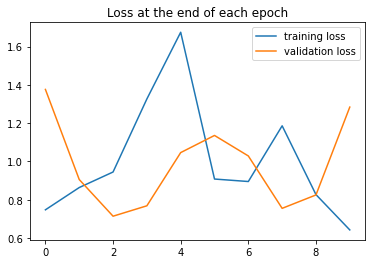

In [48]:
'''
    TODO: Plot the train_losses and test_losses. Reminder: Use loss.item()
'''
train_losses = [loss.item() for loss in train_losses]
test_losses  = [loss.item() for loss in test_losses]

plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();


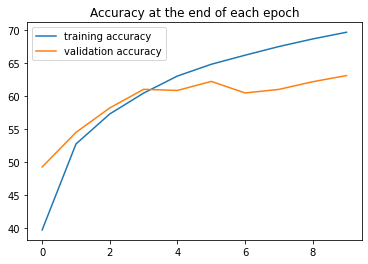

In [49]:
'''
    TODO: Plot the train_correct and test_correct. Put the appropriate labels in the graph.
'''
plt.plot([t/500 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct],  label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [50]:
''' 
    TODO:
        Define model2 = ConvolutionalNetwork(). Then, instantiate the saved model and load saved parameters.
        Evaluate model2
'''
model2 = ConvolutionalNetwork()
model2.load_state_dict(torch.load('models/CIFAR10-CNN-Model.pt'))
model2.eval()

ConvolutionalNetwork(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
# TODO: Initialize a data loader from the test_data with batch_size of 10000 and no shuffle
# test_load_all = ?
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

# TODO: Test the data using model2
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model2(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

Test accuracy: 6259/10000 =  62.590%


TODO: What is your test accuracy?

In [ ]:
X = self.conv1(X)
X = F.relu(X)
X = F.max_pool2d(X, 2, 2)